In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df= pd.read_csv('../data/gdp_percapita.csv')
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [3]:
gdp_df.shape
#7662 rows and 4 col.

(7662, 4)

In [4]:
gdp_df.dtypes
#Country or Area     object
#Year                 int64
#Value              float64
#Value Footnotes    float64

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
gdp_df= gdp_df.drop(columns = ['Value Footnotes'])
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [7]:
gdp_df =gdp_df.rename(columns= {'Country or Area' : 'Country', 'Value':'GDP_Per_Capita'})

In [8]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


7.How many countries have data for all years?
Which countries are missing many years of data? Look at the number of observations per year.
What do you notice?

In [10]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


In [11]:
#1990
gdp_df['Year'].min()

1990

In [12]:
#2022
gdp_df['Year'].max()

2022

In [13]:
#for each country count years =33 Including both 1990 and 2022
gdp_df.Country.value_counts()

Country
Least developed countries: UN classification    33
Middle East & North Africa                      33
Middle East & North Africa (IDA & IBRD)         33
Middle income                                   33
Mongolia                                        33
                                                ..
Kosovo                                          15
Sint Maarten (Dutch part)                       14
Turks and Caicos Islands                        12
Somalia                                         10
Djibouti                                        10
Name: count, Length: 242, dtype: int64

In [286]:
yearly_observation= gdp_df.Year.value_counts()
yearly_observation

Year
2013    242
2016    242
2014    242
2015    242
2020    242
2017    242
2018    242
2019    242
2021    241
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64

In [15]:
yearly_observations=yearly_observation.to_frame()

In [16]:
yearly_observations

,count
Year,
2013,242
2016,242
2014,242
2015,242
2020,242
2017,242
2018,242
2019,242
2021,241


In [18]:
#yearly obervations seem to increse per year
yearly_observations.sort_values(by ='Year', ascending = True)

,count
Year,
1990,207
1991,208
1992,210
1993,211
1994,213
1995,223
1996,223
1997,226
1998,226


8.In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

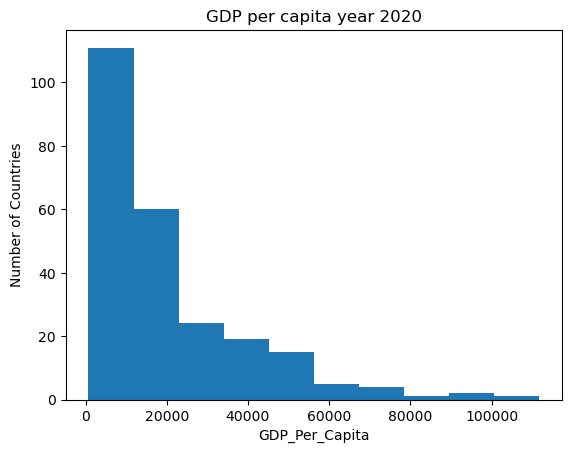

In [58]:
#histogram
gdp20 =gdp_df[gdp_df['Year'] == 2020]

plt.hist(gdp20['GDP_Per_Capita'], bins=10)
plt.xlabel('GDP_Per_Capita')
plt.ylabel('Number of Countries')
plt.title('GDP per capita year 2020')

plt.show()

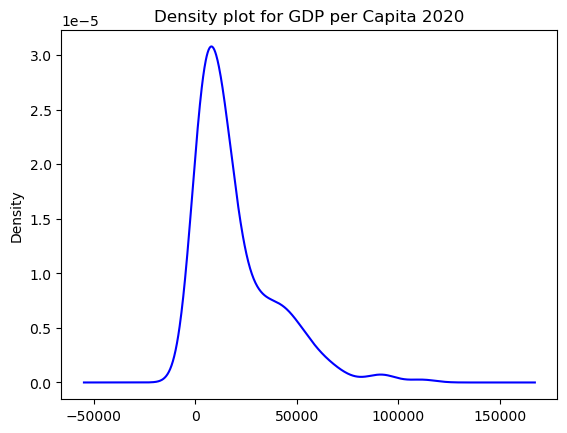

In [46]:
#density plot
gdp20.GDP_Per_Capita.plot.density(color= 'blue')
plt.title('Density plot for GDP per Capita 2020')
plt.show()

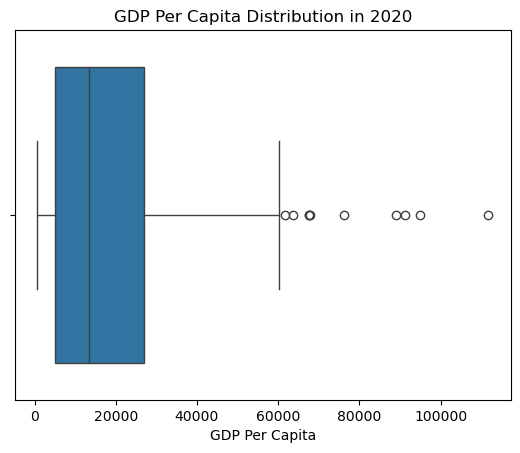

In [56]:
#boxplot
sns.boxplot(x=gdp20['GDP_Per_Capita'])
plt.xlabel('GDP Per Capita')
plt.title('GDP Per Capita 2020')
plt.show()

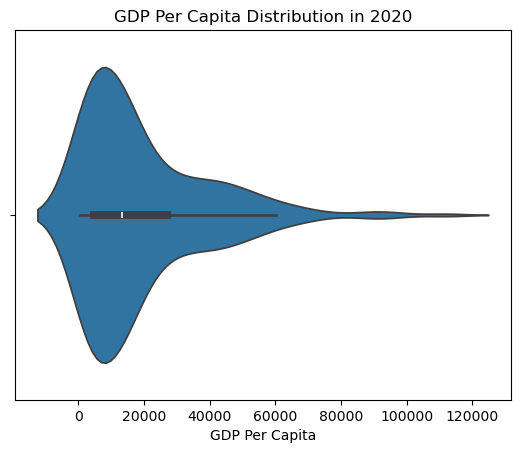

In [48]:
#violin plot
sns.violinplot(x=gdp20['GDP_Per_Capita'])
plt.xlabel('GDP Per Capita')
plt.title('GDP Per Capita Distribution in 2020')
plt.show()



9. What was the median GDP per capita value in 2020?
Median: 1968.341002

In [64]:
gdp20 = gdp_df[gdp_df['Year'] == 2020]
gdp20

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


In [70]:
gdp20['GDP_Per_Capita'].median

<bound method Series.median of 1        1968.341002
22       3455.023119
55       3957.933804
88      13278.369769
121     10844.770764
            ...     
7503    10450.622382
7536     5402.538773
7565    16204.169107
7598     3183.650773
7631     1990.319419
Name: GDP_Per_Capita, Length: 242, dtype: float64>

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

A boxplot
A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
A scatterplot
A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [104]:
gdpmyrs= gdp_df[(gdp_df['Year'] == 1990) | (gdp_df['Year'] == 2000) | (gdp_df['Year'] == 2010) | (gdp_df['Year'] == 2020)]
gdpmyrs

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


In [98]:
my_list= [1990, 2000, 2010, 2020]
gdpmyears =gdp_df.loc[gdp_df.Year.isin(my_list)]
gdpmyears

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


Text(0.5, 1.0, 'GDP per Capita by Year')

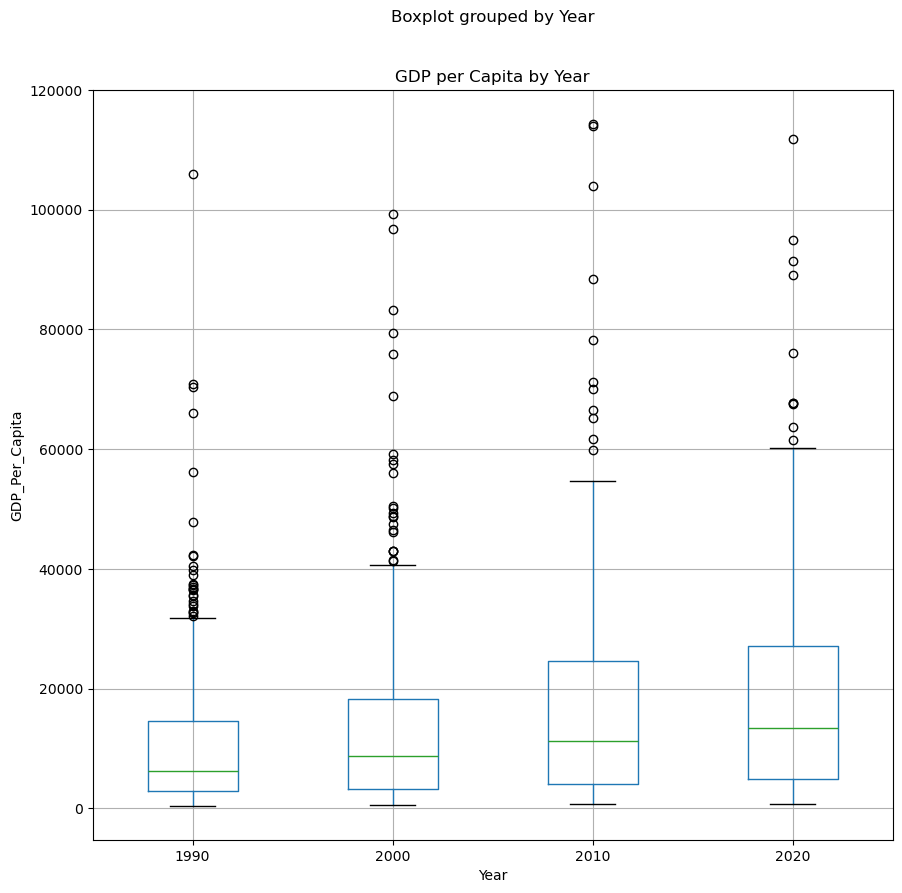

In [126]:
ax= gdpmyrs.boxplot(column= 'GDP_Per_Capita', by= 'Year', figsize=(10,10))
ax.set_ylabel("GDP_Per_Capita")
ax.set_xlabel("Year")
ax.set_title('GDP per Capita by Year')

Text(0.5, 1.0, 'Yearly GDP per Capita')

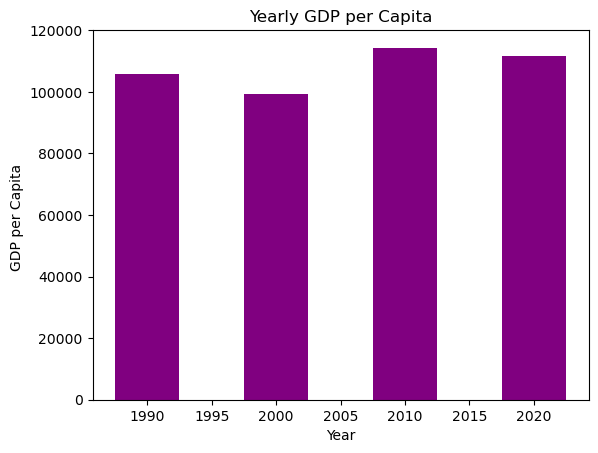

In [134]:
plt.bar(gdpmyrs['Year'],gdpmyrs['GDP_Per_Capita'], color= 'purple', width= 5) 
plt.xlabel('Year')
plt.ylabel('GDP per Capita ')
plt.title('Yearly GDP per Capita')

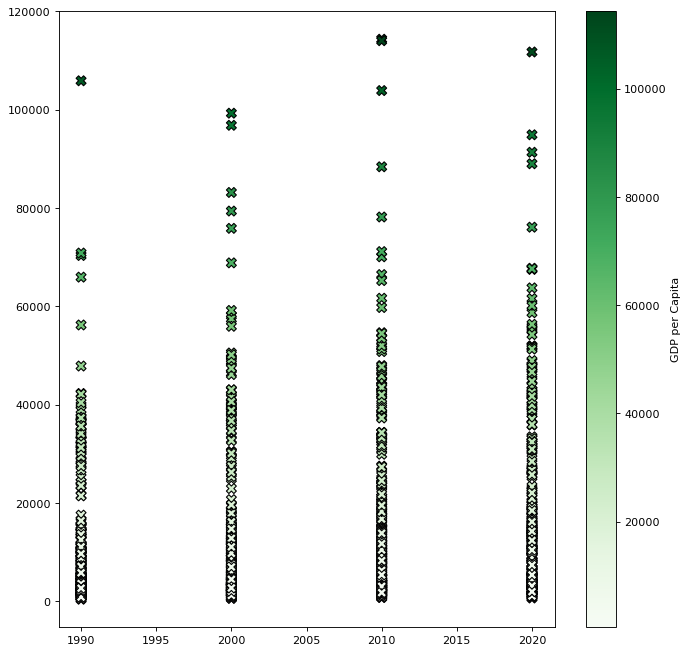

In [162]:
plt.figure(figsize=(10,10), dpi=80)
#s => size of dots
#c => color of dots
#marker =>symbol for scatter plot
plt.scatter(gdpmyrs['Year'],gdpmyrs['GDP_Per_Capita'],
            s= 80, c= gdpmyrs['GDP_Per_Capita'], cmap= 'Greens', 
            edgecolor= 'black', marker= 'X',)
#for the colorbar 
cbar = plt.colorbar()
cbar.set_label('GDP per Capita')

In [174]:
sns.regplot(gdpmyrs['Year'],gdpmyrs['GDP_Per_Capita'],
line_kws = {"color": "red", "linewidth": 1.5})
#?????

TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

11. Which country was the first to have a GDP per capita greater than $100,000?
    ANSWER: 7302	United Arab Emirates	1990	105893.626059

In [186]:
gdpover100000 =gdp_df.loc[gdp_df['GDP_Per_Capita'] > 100000]
gdpover100000

,Country,Year,GDP_Per_Capita
3277,Ireland,2022,113870.785550
3278,Ireland,2021,102785.490239
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563


In [192]:
gdpover100000.nsmallest(1,'Year')

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059


12. Which country had the highest GDP per capita in 2020?
    ANSWER: 4148	Luxembourg	2020	111751.314751
    It has steadily increased throught the years
    Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [198]:
C20=gdp_df.loc[gdp_df['Year']==2020]
C20.nlargest(1,'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [202]:
Luxembourg= gdp_df.loc[gdp_df['Country']=='Luxembourg']
Luxembourg

,Country,Year,GDP_Per_Capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563
4154,Luxembourg,2014,113313.578898
4155,Luxembourg,2013,113050.663254


<BarContainer object of 33 artists>

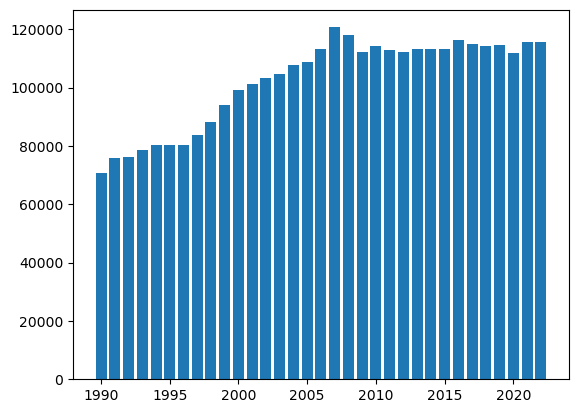

In [206]:

plt.bar(Luxembourg['Year'], Luxembourg['GDP_Per_Capita'])

13. Which country had the lowest GDP per capita in 2020?
    ANSWER: 973	Burundi	2020	711.355263    It has signifcanlty decreased
 Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset
 Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [212]:
countries20 = gdp_df.loc[gdp_df['Year']==2020]
countries20.nsmallest(1, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [220]:
Burundi = gdp_df.loc[gdp_df['Country'] == 'Burundi']

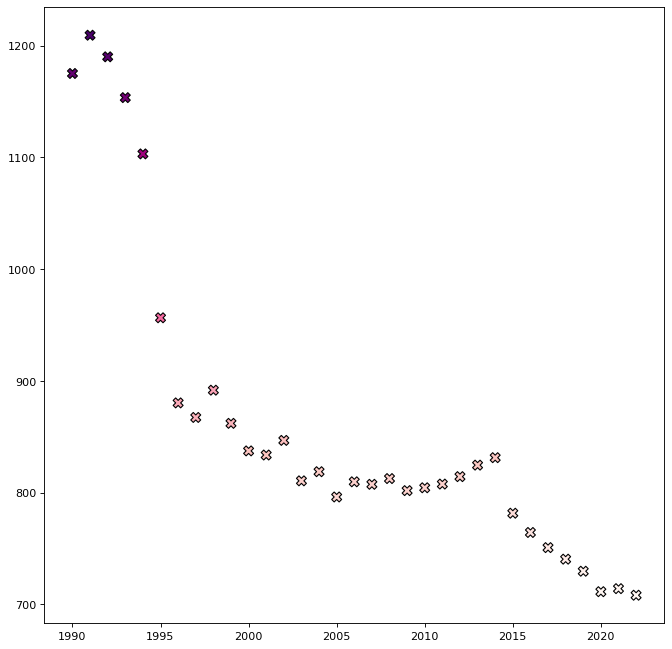

In [228]:
plt.figure(figsize=(10,10), dpi=80)
#s => size of dots
#c => color of dots
#marker =>symbol for scatter plot
plt.scatter(Burundi['Year'],Burundi['GDP_Per_Capita'],
            s= 80, c= Burundi['GDP_Per_Capita'], cmap= 'RdPu', 
            edgecolor= 'black', marker= 'X',)

14. Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [268]:
internet_use = pd.read_csv('../data/internet_use.csv', on_bad_lines= 'skip')
internet_use

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4
...,...,...,...,...
6375,293,Estimated based on Survey's results. Populatio...,NaN,NaN
6376,294,Preliminary. Country estimate.,NaN,NaN
6377,295,18+. ITU estimate.,NaN,NaN
6378,296,ICT survey. Population age 11+,NaN,NaN


15. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'

In [ ]:
internet_use = internet_use.drop(columns= 'Value Footnotes')

In [276]:
internet_use

,Country or Area,Year,Value
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26
...,...,...,...
6375,293,Estimated based on Survey's results. Populatio...,NaN
6376,294,Preliminary. Country estimate.,NaN
6377,295,18+. ITU estimate.,NaN
6378,296,ICT survey. Population age 11+,NaN


In [278]:
internet_use.columns= ['Country', 'Year', 'Internet_Users_Pct']
internet_use.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


In [314]:
internet_use= internet_use.loc[internet_use['Year'].str.isdigit()]
internet_use

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [320]:
internet_use.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6083 entries, 0 to 6082
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             6083 non-null   object 
 1   Year                6083 non-null   object 
 2   Internet_Users_Pct  6083 non-null   float64
dtypes: float64(1), object(2)
memory usage: 190.1+ KB


16. Look at the number of observations in this dataset per year. What do you notice?
    As the years pass the observations go down

In [290]:
yealry_val_count=internet_use.Year.value_counts()

In [300]:
yearly_obs = yealry_val_count.to_frame()
yearly_obs

,count
Year,
1990,226
2007,217
2011,214
2008,214
2009,214
...,...
Direct respondent as of 15.,1
INFORMANTE DIRECTO DE 15 AÑOS Y MÁS,1
"La información corresponde si ha usado el Internet, desde cualquier lugar en los últimos 12 meses",1


17. What is the first year to have a non-zero internet users percentage value?

18. How does the distribution of internet users percent differ for 2000 and 2014?

19. For how many countries was the percentage of internet users below 5% in 2014?